<a href="https://colab.research.google.com/github/wangechi-wq/IPWKK2/blob/main/Copy_of_Copy_of_IPWEEK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Defining the Question
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

Dataset: [http://bit.ly/FinancialDataset]

# b) Specifying the Data Analytic Question
How to predict which individuals are most likely to have or use a bank account.

#C) How to predict which individuals are most likely to have or use a bank account.

# D) Understanding the context

#E) Recording the Experimental Design

#2) Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/FinancialDataset
# ---
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_style()

f_data = pd.read_csv('http://bit.ly/FinancialDataset')

# 3) Checking the Data

3. Checking the Data

In [ ]:
# no. of records in dataset
f_data.shape

(23524, 13)

The dataset has 23524 rows and 13 columns

In [ ]:
# Previewing the top of our dataset
f_data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Check statistical info for the dataset

f_data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


 An anomality on the year column where year 2056  will be corrected

In [ ]:
# Checking for missing data
# 
f_data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

There is alot of missing data will be fixed during data cleaning

In [ ]:
# Checking whether each column has an appropriate datatype
f_data.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

#4) Cleaning of data

In [ ]:
# Renaming wrongly labelled columns
f_col = f_data.rename(columns={"Has a Bank account":"has_a_bank_account", "Type of Location":"type_of_location", "Cell Phone Access":"cellphone_access", "Respondent Age":"respondent_age",
                        "The relathip with head": "relationship_with_head", "Level of Educuation": "level_of_Education", "Type of Job":"type_of_job"})
# Check changes
f_data.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# fill the missing data in the columns

f_col['country']= f_col['country'].ffill(axis = 0) 
f_col['type_of_location'] = f_col['type_of_location'].ffill(axis=0)

In [ ]:
# filling null values

fcol = [i for i in f_col.columns] 
f_imp =f_col[fcol].fillna(f_col.mode().iloc[0]) 
f_imp.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cellphone_access          0
household_size            0
respondent_age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
level_of_Education        0
type_of_job               0
dtype: int64

In [ ]:
# Convert Household dtype from float to integer

f_imp['household_size'] = f_imp['household_size'].astype(int)

# 5) Tidying the Dataset

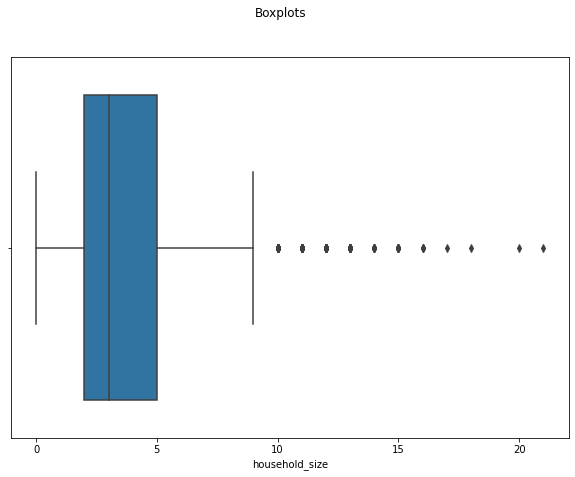

In [ ]:
# Checking for Outliers
fig, ((ax1)) = plt.subplots(1,1, figsize=(10, 7))
fig.suptitle('Boxplots')

sns.boxplot(x=f_imp['household_size'])

plt.show()

There are outliers which will be remove to make  results statistically significant

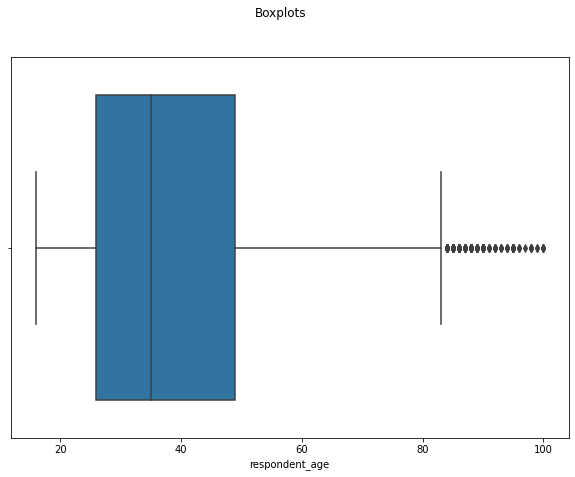

In [ ]:
fig, ((ax1)) = plt.subplots(1,1, figsize=(10, 7))
fig.suptitle('Boxplots')

sns.boxplot(x=f_imp['respondent_age'])

plt.show()



There are outliers which will be remove to make results statistically significant

In [ ]:
# remove the outliers
# Define Q1, Q3 and IQR
#  
f_imp['year'] = f_imp['year'].astype('str')
Q1 = f_imp.quantile(0.25)
Q3 = f_imp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# 

# The data point where we have False that means these values are valid 
# whereas True indicates there is  an outlier.
#
print((f_imp < (Q1 - 1.5 * IQR)) |(f_imp > (Q3 + 1.5 * IQR)))
f_iqr = f_imp[~((f_imp < (Q1 - 1.5 * IQR)) |(f_imp > (Q3 + 1.5 * IQR))).any(axis=1)]

household_size     3.0
respondent_age    23.0
dtype: float64
       cellphone_access  country  ...  uniqueid   year
0                 False    False  ...     False  False
1                 False    False  ...     False  False
2                 False    False  ...     False  False
3                 False    False  ...     False  False
4                 False    False  ...     False  False
...                 ...      ...  ...       ...    ...
23519             False    False  ...     False  False
23520             False    False  ...     False  False
23521             False    False  ...     False  False
23522             False    False  ...     False  False
23523             False    False  ...     False  False

[23524 rows x 13 columns]


In [ ]:
# Checking for Anomalies
#
print(f_iqr['year'].value_counts())

print(f_iqr['level_of_Education'].value_counts())

2016    8562
2018    7798
2017    6543
2056       1
2029       1
2039       1
Name: year, dtype: int64
Primary education                  12557
No formal education                 4270
Secondary education                 4114
Tertiary education                  1147
Vocational/Specialised training      787
6                                     25
Other/Dont know/RTA                    6
Name: level_of_Education, dtype: int64


# 6) Exploratory Analysis

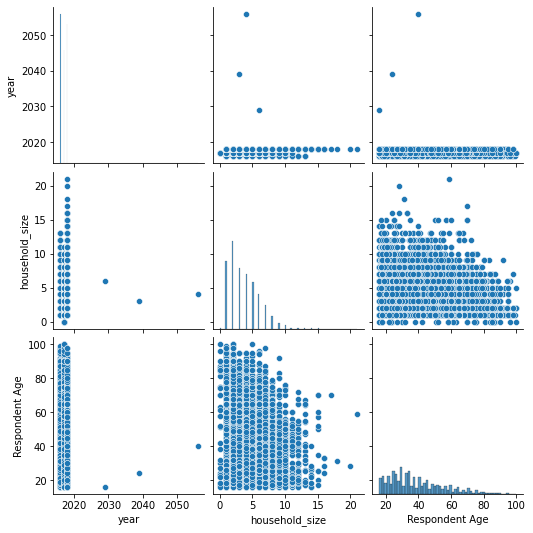

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(f_data)
plt.show()

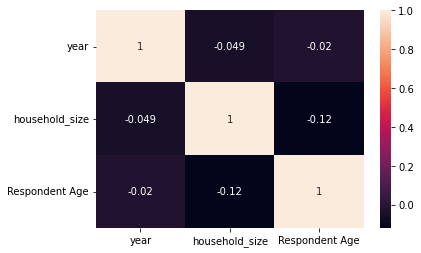

In [ ]:
sns.heatmap(f_data.corr(),annot=True)
plt.show()

In [ ]:
# We create another dataframe f1 with only valid years and level of education
# 
f_new = f_iqr[(f_iqr['year'] != '2029') & (f_iqr['year'] != '2056') & (f_iqr['year'] != '2039')
      & (f_iqr['level_of_Education'] != "6")]
print(f_new['year'].value_counts())
print(f_new['level_of_Education'].value_counts())

2016    8545
2018    7793
2017    6540
Name: year, dtype: int64
Primary education                  12556
No formal education                 4270
Secondary education                 4113
Tertiary education                  1146
Vocational/Specialised training      787
Other/Dont know/RTA                    6
Name: level_of_Education, dtype: int64


Only the valid years and level of education are  in the dataset

#7) Implementing the Solution: Label encoding the variables

In [ ]:
# importing the library in use
from sklearn.preprocessing import LabelEncoder
# Make a copy of the dataframe as f1
f1 = f_new
# 
encoder = LabelEncoder()
f1['has_a_bank_account'] = encoder.fit_transform(f1['has_a_bank_account'])
f1['type_of_location'] = f1['type_of_location'].replace({'Rural':0, 'Urban':1})
f1['cellphone_access'] = encoder.fit_transform(f1['cellphone_access'])
f1['gender_of_respondent'] = f1['gender_of_respondent'].replace({'Female':0, 'Male':1})
f1['relationship_with_head'] = f1['relationship_with_head'].replace({'Spouse':0, 'Head of Household':1,'Other relative':2, 'Child':3,
                                'Parent':4, 'Other non-relatives':5})
f1['marital_status'] = f1['marital_status'].replace({'Married/Living together':0, 'Widowed':1, 'Single/Never Married':2, 'Divorced/Seperated':3, 'Dont know':4 })
f1['level_of_Education'] = f1['level_of_Education'].replace({'Primary education':0, 'No formal education':1, 'Secondary education':2, 'Tertiary education':3,
                           'Vocational/Specialised training':4, 'Other/Dont know/RTA':5 })
f1['type_of_job'] = f1['type_of_job'].replace({'Self employed':0, 'Informally employed':1, 'Farming and Fishing':2, 'Remittance Dependent':3,
                           'Other Income':4, 'Formally employed Private':5, 'No Income':6, 'Formally employed Government':7,'Government Dependent':8,
                           'Dont Know/Refuse to answer':9 })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

# 8)Univariate Analysis

In [ ]:
import seaborn as sns
%matplotlib inline

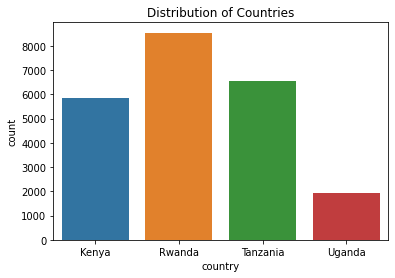

In [ ]:
# Frequency count of country 
# 
sns.countplot(x= 'country', data=f1)
plt.title("Distribution of Countries" )
plt.show()

Rwanda leads with having most people taking a survey

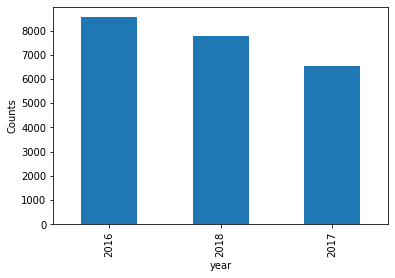

In [ ]:
# Year column
# Bar graph
# 
f1['year'].value_counts().plot(kind='bar')
plt.xlabel("year")
plt.ylabel("Counts")
plt.show()

Most data was collected in 2016 with 2018 and 2017 respectively

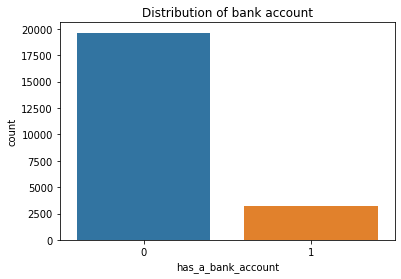

In [ ]:
# A distribution of bank ownership
# 
sns.countplot(x= 'has_a_bank_account', data=f1)
plt.title("Distribution of bank acc" )
plt.show()

0 - No & 1 - Yes

Most of the respondents don't have bank accounts

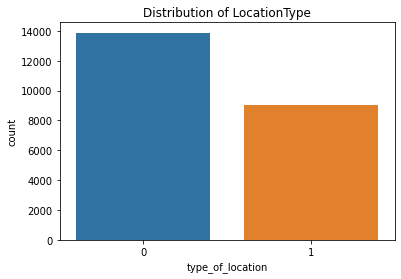

In [ ]:
# A distribution of how the respondents where distributed
# 
sns.countplot(x='type_of_location', data=f1)
plt.title("Distribution of LocationType" )
plt.show()

Rural - 0 & Urban - 1

Most respondents were from  rural places

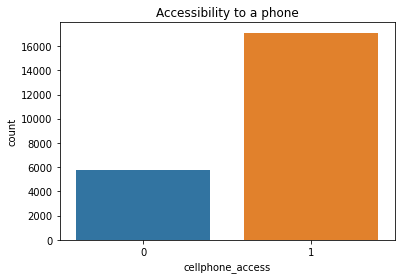

In [ ]:
# Cell_phone access column
# 
sns.countplot(x='cellphone_access', data=f1)
plt.title("Accessibility to a phone")
plt.show()

Most respondents had access to phones

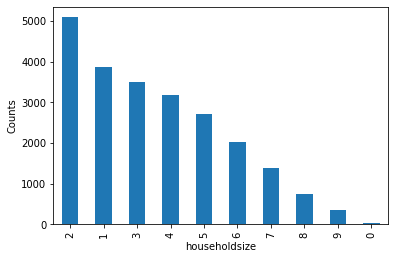

In [ ]:
# Distribution for householdsize
# 
f1['household_size'].value_counts().plot(kind='bar')
plt.xlabel("householdsize")
plt.ylabel("Counts")
plt.show()

most households had 2 people at most living in the same house with the numbers reducing as we move across large household size

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


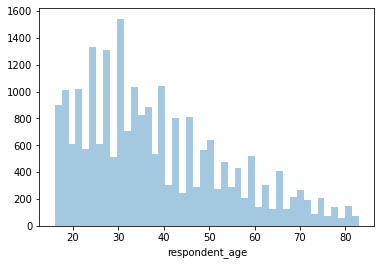

In [ ]:
# Respondent Age 

sns.distplot(f1.respondent_age, kde=False)
plt.show()

Data is skewed to the left which means most of the respondents are of the age of between 15 years to 40

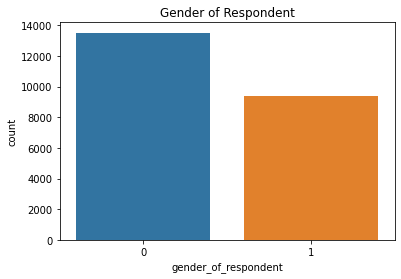

In [ ]:
# Gender of respondent 

sns.countplot(x="gender_of_respondent", data=f1)
plt.title("Gender of Respondent")
plt.show()

Most of the respondents were female

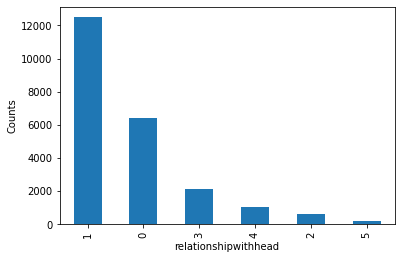

In [ ]:
# Frequency distribution for realtionshipwithhead
# 
f1['relationship_with_head'].value_counts().plot(kind='bar')
plt.xlabel("relationshipwithhead")
plt.ylabel("Counts")
plt.show()

Spouse:0, Head of Household:1, Other relative:2, Child:3, Parent:4, Other non-relatives:5

Most people who participated in the survey were the spouses to the household heads with other non-relatives being the least

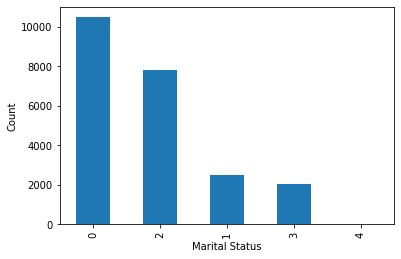

In [ ]:
# Marital Status Column
# 
f1['marital_status'].value_counts().plot(kind='bar')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

Married/Living together:0, Widowed:1, Single/Never Married:2, Divorced/Seperated:3, Dont know:4

Most of the interviewees were Married, with the single ones following next 

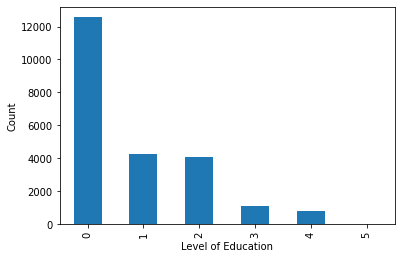

In [ ]:
# Level of Education Column
# 
f1['level_of_Education'].value_counts().plot(kind='bar')
plt.xlabel("Level of Education")
plt.ylabel("Count")
plt.show()

Primary education:0, Noformal education:1, Secondary education:2, Tertiary education:3, Vocational/Specialised training:4, Other/Dont know/RTA:5

Most respondents had Primary School as their highest level of education

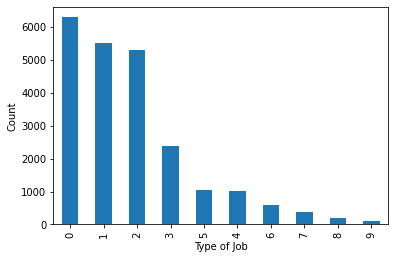

In [ ]:
# Level of Type of Job Column
# 
f1['type_of_job'].value_counts().plot(kind='bar')
plt.xlabel("Type of Job")
plt.ylabel("Count")
plt.show()

Self employed:0, Informally employed:1, Farming and Fishing:2, Remittance Dependent:3, Other Income:4, Formally employed Private:5, No Income:6,Formally employed Government:7, Government Dependent:8, Dont Know/Refuse to answer:9

Self employed led with the ones with a small that refused to answer

#9) Bivariate Analysis

Text(0, 0.5, 'Count')

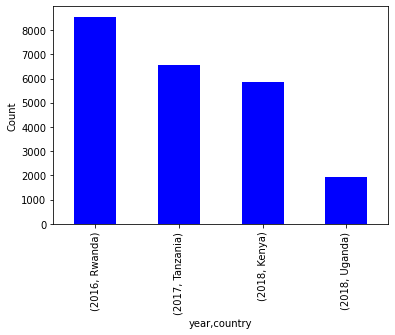

In [ ]:
# visualization of how the data was collected over the years
# 
Count_year = f1.groupby (['year','country',])['country'].count()
Count_year.plot(kind='bar', color='blue')
plt.ylabel('Count')

 Data was collected in some years for the 4 countries

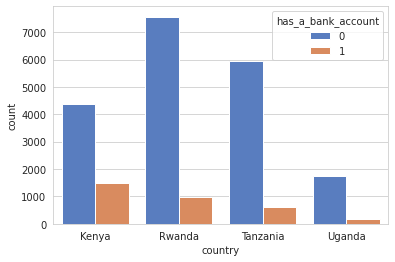

In [ ]:
# Comparing the countries distribution of the bank accounts

sns.set_style('whitegrid')
sns.countplot(x='country',hue='has_a_bank_account',data=f1,palette='muted')

Yes-1, No-0

Rwanda leads as the country with most respondents not having bank accounts with Kenya leading with most respondents having bank accounts.

Uganda was least in both

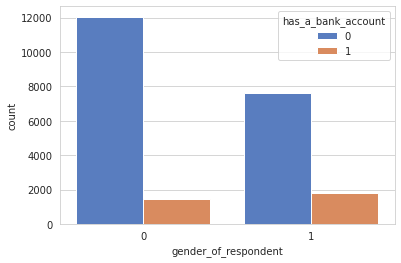

In [ ]:
#  Account ownership for both  gender 
# 
sns.set_style('whitegrid')
sns.countplot(x='gender_of_respondent',hue='has_a_bank_account',data=f1,palette='muted')

Most female respondents did not have acess to bank accounts with slightly more male respondents having bank accounts compared to females

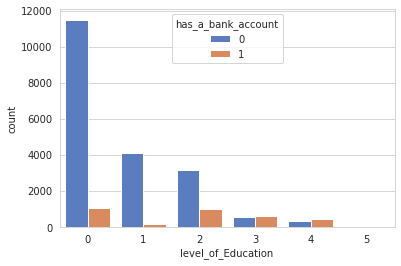

In [ ]:
# Account owwership Vs Level of education
# 
sns.set_style('whitegrid')
sns.countplot(x='level_of_Education',hue='has_a_bank_account',data=f1,palette='muted')

Respondents with Primary level of education led with the number having no bank accounts and the same with the highest ownership of bank accounts with No formal level of education following next as the people not having accounts with the Tertiary level of education respondents having nearly equally the same number for both people having and not having accounts.

Primary education:0, No formal education:1, Secondary education:2, Tertiary education:3, Vocational/Specialised training:4, Other/Dont know/RTA:5

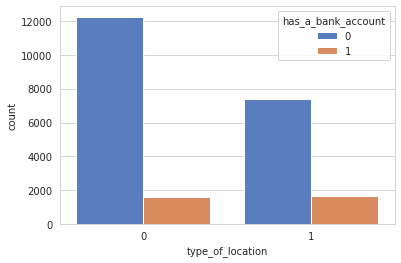

In [ ]:
# Account owwership Vs type of Location

sns.set_style('whitegrid')
sns.countplot(x='type_of_location',hue='has_a_bank_account',data=f1,palette='muted')

Yes - 1 No - 0

Most respondents from the rural areas did not have bank accounts compared to people in the urban areas with an equal number in both regions having bank accounts.

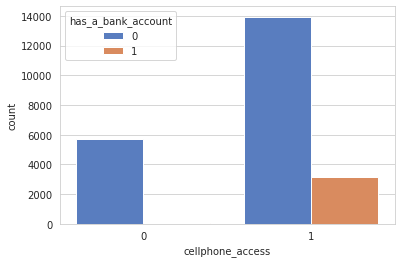

In [ ]:
# Account owwership Vs Access to a cellphone

sns.set_style('whitegrid')
sns.countplot(x='cellphone_access',hue='has_a_bank_account',data=f1,palette='muted')

Yes - 1, No - 0

Most of the respondents had access to a cellphone but also led as the group with no bank accounts.

which might mean most of them considered doing mobile transactions compared to bank transactions

Less that 1000 of the people who did not have access to a cellphone lacked bank accounts.

which might mean they lacked financial education and  need for bank acounts 

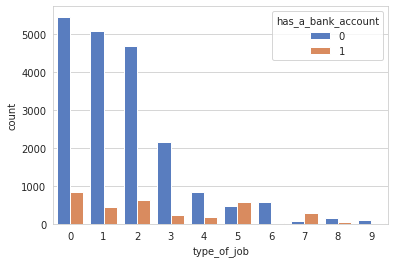

In [ ]:
# Account owwership Vs type_of_job
# 
sns.set_style('whitegrid')
sns.countplot(x='type_of_job',hue='has_a_bank_account',data=f1,palette='muted')

Self employed:0, Informally employed:1, Farming and Fishing:2, Remittance Dependent:3, Other Income:4, Formally employed Private:5, No Income:6,Formally employed Government:7, Government Dependent:8, Dont Know/Refuse to answer:9

Self employed group had most people without bank accounts with also having most people having bank accounts compared to the rest of the job types.

People doing Farming and fishing followed closely in numbers as the group with most people having bank accounts

Respondents from the Private sector had closely an equal tally of both owning and not owning a bank account.

Respondents formally employed by the government had a big gap of people owning and not owning accounts with a big number of those who participated in the survey possessing bank accounts



In [ ]:
# Correlation matrix to see the correlation between the different variables
# 
f1.corr()

,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_Education,type_of_job
has_a_bank_account,1.000000,0.089255,0.209541,-0.021881,0.025301,0.116590,-0.038164,-0.072204,0.339165,0.179876
type_of_location,0.089255,1.000000,-0.090855,-0.286670,-0.048825,0.011991,0.032224,0.241884,0.084094,-0.068507
cellphone_access,0.209541,-0.090855,1.000000,0.110665,-0.080501,0.103102,-0.011526,-0.120117,0.138177,0.027118
household_size,-0.021881,-0.286670,0.110665,1.000000,-0.105352,0.010032,0.077390,-0.336937,-0.010001,0.042256
respondent_age,0.025301,-0.048825,-0.080501,-0.105352,1.000000,0.014217,-0.282122,-0.221675,-0.095886,-0.005905
gender_of_respondent,0.116590,0.011991,0.103102,0.010032,0.014217,1.000000,0.237185,0.015945,0.039438,-0.053304
relationship_with_head,-0.038164,0.032224,-0.011526,0.077390,-0.282122,0.237185,1.000000,0.441977,0.123554,0.086515
marital_status,-0.072204,0.241884,-0.120117,-0.336937,-0.221675,0.015945,0.441977,1.000000,0.070569,-0.035828
level_of_Education,0.339165,0.084094,0.138177,-0.010001,-0.095886,0.039438,0.123554,0.070569,1.000000,0.236945
type_of_job,0.179876,-0.068507,0.027118,0.042256,-0.005905,-0.053304,0.086515,-0.035828,0.236945,1.000000


We observe a perfect linear relationship between a variable and itself which is normal

There is a positive linear relationship between the level of education and bank account ownership.

A negative relationship is observed between maritas status and bank account ownership which means that maritas status does not determine whether someone must have a bank account or not.

In [ ]:
# Having considered having a bank account as our targrt variable, we now create
# a datafrma with people owning bank accounts
# 
bank = f1[f1['has_a_bank_account'] == 1]
bank.sample(2)

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_Education,type_of_job
3201,Kenya,2018,uniqueid_3202,1,1,1,1,77.0,0,1,2,0,4
10063,Rwanda,2016,uniqueid_3996,1,0,1,6,45.0,0,0,0,0,2


In [ ]:
print(f_data.shape)
# 
# Print out the shape of respondents owning bank accounts
print(bank.shape)

(23524, 13)
(3242, 13)


Text(0, 0.5, 'Bank Accounts')

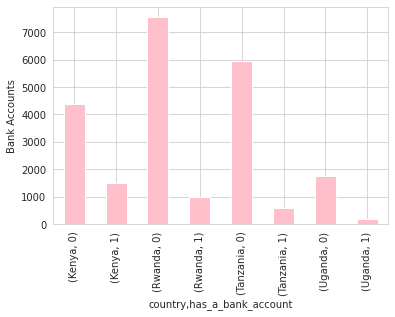

In [ ]:
# Account ownership across the countries
# 
f1.groupby(['country','has_a_bank_account'])['has_a_bank_account'].count().plot(kind='bar', color='pink')
plt.ylabel('Bank Accounts')

Kenya leads with most people having bank accounts which is an indication of financial inclusion.

In [ ]:
# Create a dataframe with only kenya respondents
# 
f_ke = bank[bank['country']== 'Kenya']
f_ke.sample(4)

,country,year,uniqueid,has_a_bank_account,type_of_location,cellphone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of_Education,type_of_job
3517,Kenya,2018,uniqueid_3518,1,1,1,3,52.0,0,1,0,4,0
5820,Kenya,2018,uniqueid_5821,1,1,1,1,22.0,0,1,2,2,5
3779,Kenya,2018,uniqueid_3780,1,1,1,7,30.0,0,0,0,4,5
1104,Kenya,2018,uniqueid_1105,1,1,1,2,23.0,0,5,2,3,3


Text(0, 0.5, 'Bank Acc')

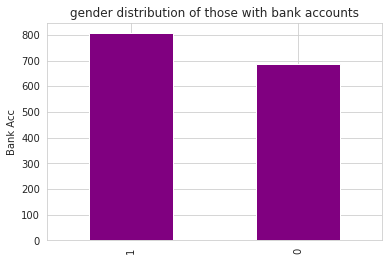

In [ ]:
# Gender Vs Bank Account
# 
f_ke['gender_of_respondent'].value_counts().plot.bar(title='gender distribution of those with bank accounts', color='purple')
plt.ylabel('Bank Acc')

We observe a difference of about 110 of between males and females who ownwed accounts.

This shows equal opportunity to financial knowledge to both genders.

Text(0, 0.5, 'Bank Acc')

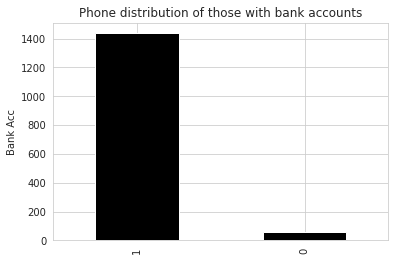

In [ ]:
# Cellphone access vs bank account
# 
f_ke['cellphone_access'].value_counts().plot.bar(title='Phone distribution of those with bank accounts', color='black')
plt.ylabel('Bank Acc')

most of the people who had access to a cellphone had bank accounts  as well

Text(0, 0.5, 'Bank Acc')

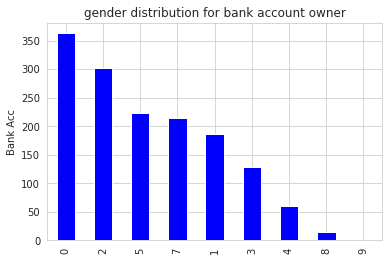

In [ ]:
f_ke['type_of_job'].value_counts().plot.bar(title='gender distribution for bank account owner', color='blue')
plt.ylabel('Bank Acc')

Self employed:0, Informally employed:1, Farming and Fishing:2, Remittance Dependent:3, Other Income:4, Formally employed Private:5, No Income:6,Formally employed Government:7, Government Dependent:8, Dont Know/Refuse to answer:9

Of the total number of respondents, about 360 of them who were self employed had bank accounts with people in the Farming and Fishings following with about 310 persons with bank accounts. The rest of the job types followed progressivel as shown above.

#10) Multivariate Analysis

<Figure size 800x640 with 0 Axes>

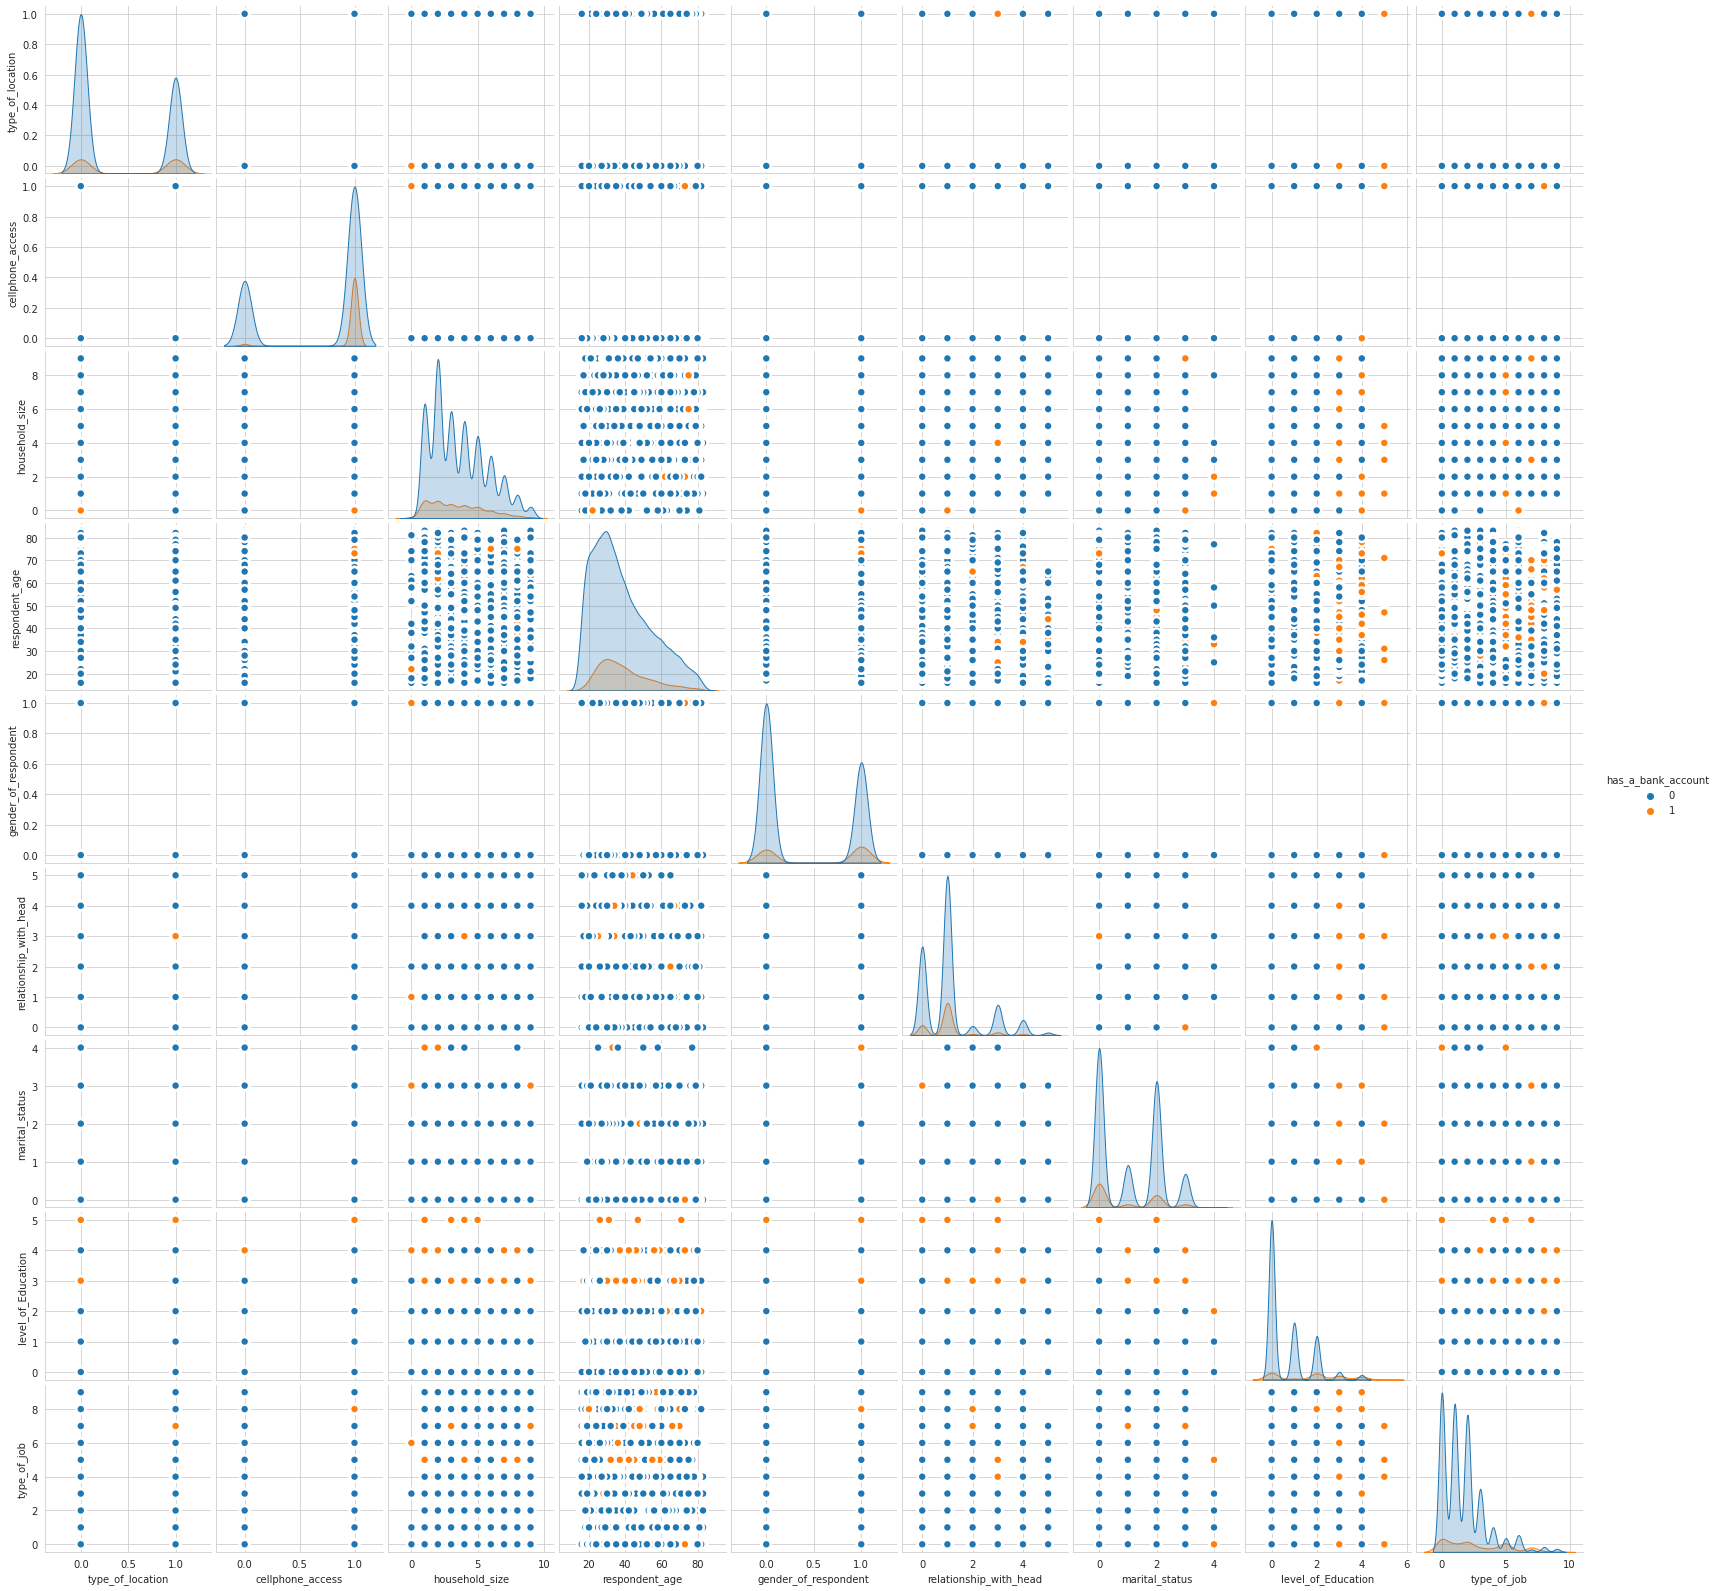

In [ ]:
# Pair wise plots help in understanding the relationship between all possible pairs of numeric variables
# 
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(f1, kind="scatter", hue="has_a_bank_account", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

There's a negative correlation between respondent age and the household size in that as you move across the age bracket, the household size decreases.

The same plot also shows that people of advanced age owned bank accounts.

Feature reduction: Principal Component Analysis (PCA)

In [ ]:
# First step is to divide the dataset into a feature set and corresponding labels
# 
x = f1.iloc[:, 3:12].values
y = f1['has_a_bank_account']

In [ ]:
# shape of the dataset
print(x.shape)
print(y.shape)

(22878, 9)
(22878,)


In [ ]:
# Split the data to train and test dataset
# 
from sklearn.model_selection import train_test_split
# 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Do Normalization using Standard Scaler
# 
from sklearn.preprocessing import StandardScaler
# 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
from sklearn.decomposition import PCA
# 
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
# Calculate the Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components.
# 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20335074, 0.17244987, 0.15201151, 0.11513569, 0.09405786,
       0.08560081, 0.06934935, 0.06637085, 0.04167331])

The first component accounts for 54% variance with the second component causing 46% variance

Logistic Regression

In [ ]:
# Use one component
pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
# # import the library to be used
# 
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)
# 
# Use the model to make a prediction
y_pred = LogReg.predict(x_test)
# 
# Evaluate the model
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# 
confusion_matrix = confusion_matrix(y_test, y_pred )
print(confusion_matrix)
# 
print('Accuracy' , accuracy_score(y_test, y_pred))

[[3920    0]
 [ 656    0]]
Accuracy 0.8566433566433567


Random Forest

In [ ]:
# Create a new dataframe with the features that we only need
f2 = f1.drop(columns=['country', 'year', 'uniqueid'], axis=1)

In [ ]:
# Define our dependent and independent variables
# 
y = f2['has_a_bank_account'].values
# 
test_features = f2.columns.to_list()
test_features.remove('has_a_bank_account')
# 
x = f2[test_features].values
# Train using 70% of the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
# 
# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(x_train, y_train)

In [ ]:
# Predict based on the model we've trained
y_pred = forest.predict(x_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.sample(3)

,Actual,Predicted
5441,0,0.117772
1776,0,0.436954
6415,0,0.421540


 predictions are close to the actual values

In [ ]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1834511342862029
Mean Squared Error: 0.09151083251420213
Root Mean Squared Error: 0.3025075743088132


The MAE measures the average magnitude of the errors in a set of forecasts, without considering their direction

MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

Root Mean Square Error (RMSE) is the standard deviation of the residuals. Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.

#11) Conclusion:


All the countries should ensure that the citizens have access to financial services  to provide them with financial gain

Access to bank accounts has been regarded as an indicator of financial inclusion which we have observed from the data provided that it is yet to be achieved in all the countries considered above.

Financial literacy should be provided to the citizens to enable them understand how the different financial tools might be of help.